In [1]:
# Standard libray
import sys, os
from importlib import reload

# Common library
import numpy as np
import scipy
from pylab import *
import scipy.interpolate

# ROOT>....
import ROOT
# Make global style changes
ROOT.gStyle.SetOptStat(0) # Disable the statistics box
ROOT.gStyle.SetTextFont(42)
# ROOT.gStyle.SetOptFit(1111)
import atlasplots as aplt
aplt.set_atlas_style()
ROOT.gStyle.SetTitleXOffset(1)
ROOT.gStyle.SetTitleYOffset(1.8)

# Custom helper functions
import MuHelper.muhelper.helper_basic as hp
import helper_tofpet as hptof

# ROOT.gStyle.SetPalette(len(hptof.mpl_colors), hptof.mpl_colors32)
ROOT.gStyle.SetPalette(ROOT.kViridis)
# colors=[int(c) for c in hptof.mpl_colors ]
colors=hptof.mpl_colors_cls()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Welcome to JupyROOT 6.30/04
Applying ATLAS style settings


In [2]:
coinc_pairs = np.loadtxt("configurations/coinc_pairs.csv", delimiter=",")


# working_dir = "/mnt/sda2/tofpet_data/function_gen"
working_dir = "/mnt/sda2/tofpet_data/test_stand_init/"
# filename = working_dir+"data/"+  "test_layer4_trigSW_coinc.root"
filename = working_dir+"data/"+  "test_layer3_installed_coinc.root"

# Open root file

In [3]:
tfile = ROOT.TFile.Open(filename)

tree_name = tfile.GetListOfKeys()[0].GetName()
Tree = tfile.Get(tree_name)

branches = [Tree.GetListOfBranches()[i].GetName() for i in range(len(Tree.GetListOfBranches()))]
entries = Tree.GetEntries()

print("Tree name:", tree_name)
print("Branches:", branches)
print("Entries:", entries)

Tree name: data
Branches: ['step1', 'step2', 'mh_n1', 'mh_j1', 'tot1', 'time1', 'channelID1', 'energy1', 'tacID1', 'xi1', 'yi1', 'x1', 'y1', 'z1', 'mh_n2', 'mh_j2', 'time2', 'channelID2', 'tot2', 'energy2', 'tacID2', 'xi2', 'yi2', 'x2', 'y2', 'z2']
Entries: 464715


In [4]:
df = ROOT.RDataFrame(tree_name, filename)
df = df.Define('dt', '0.5*(time1-time2)')\
       .Define('time', '0.5*(time1+time2)')\
       .Define('energy', 'energy1+energy2')

Channel 29,295 entries: 46495
Channel 30,293 entries: 43645
Channel 31,291 entries: 46617
Channel 32,292 entries: 45905
Channel 33,290 entries: 48405
Channel 34,289 entries: 42361
Channel 35,287 entries: 46936
Channel 36,288 entries: 49820
Channel 37,286 entries: 45238
Channel 39,285 entries: 49293
Channels with events:  10


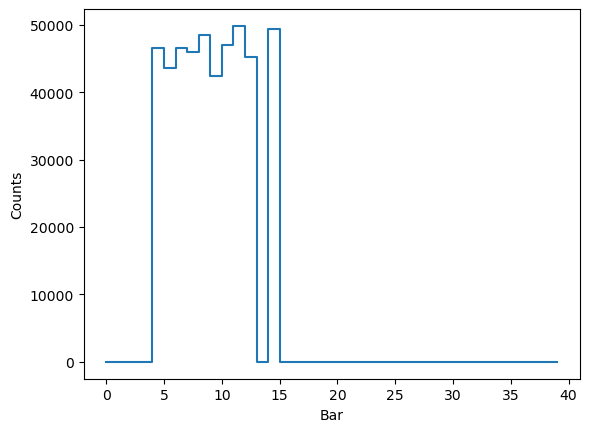

In [5]:
# Find out which channel pairs have events
bars=[]
counts=[]

for i in range(len(coinc_pairs)):
    ch1,ch2=coinc_pairs[i]
    # ch1=29;    ch2=295
    cut_ch = f"(channelID1=={ch2} && channelID2=={ch1})"
    entries = df.Filter(cut_ch).Count().GetValue()
    if entries>0: print(f"Channel {ch1:.0f},{ch2:.0f} entries:",entries)
    bars.append(i)
    counts.append(entries)

plt.step(bars, counts)
xlabel("Bar")
ylabel("Counts")

bars_with_events = np.array(bars)[np.array(counts)>0]
print("Channels with events: ", len(bars_with_events))


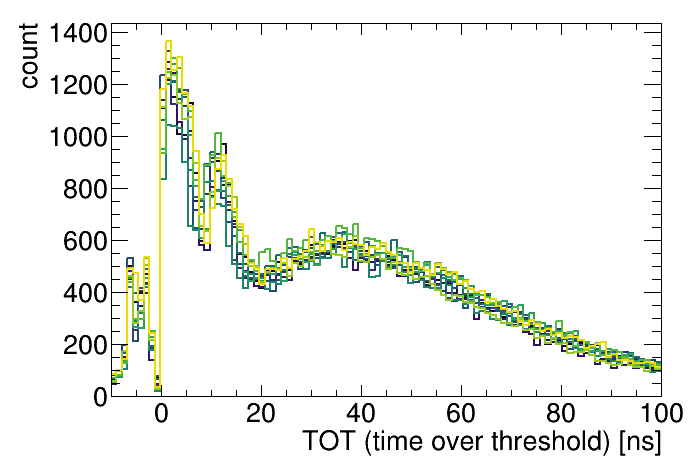

In [6]:
c2=ROOT.TCanvas(); c2.Draw();

hs = ROOT.THStack("hs",";TOT (time over threshold) [ns];count")
hists=[]
i=0
for ibar in bars_with_events:
    i+=1
    ch1,ch2=coinc_pairs[ibar]
    cut_ch = f"(channelID1=={ch2} && channelID2=={ch1})"

    # Note: The title syntax is "<Title>;<Label x axis>;<Label y axis>"
    hists.append(df.Filter(cut_ch).Histo1D(("dt", ";Energy [ns];count", 100,-10,100), 'energy1'))
    hs.Add(hists[-1].GetPtr())

hs.Draw("PLC nostack")

In [10]:
fig, ax = aplt.subplots(1, 1)
cut_e = "energy1>20 && energy2>20"
df_e1 = df.Filter(cut_e)
hists=[]
i=0
for ibar in bars_with_events:
    i+=1
    ch1,ch2=coinc_pairs[ibar]
    cut_ch = f"(channelID1=={ch2} && channelID2=={ch1})"
    # df_ch  =df_e.Filter(cut_ch)
    print(ch1, ch2, "Count", df_e1.Filter(cut_ch).Count().GetValue())

    # Note: The title syntax is "<Title>;<Label x axis>;<Label y axis>"
    hists.append(df_e1.Filter(cut_ch).Histo1D(("dt", ";dt [ns];count", 200, -15e3, 15e3), 'dt'))
    hists[-1].SetLineColor(colors[i])
    ax.plot(hists[-1].GetPtr())

ax.set_xlabel("dt [ps]")
ax.set_ylabel("Counts")

29.0 295.0 Count 21202
30.0 293.0 Count 19471
31.0 291.0 Count 21390
32.0 292.0 Count 20824
33.0 290.0 Count 22861
34.0 289.0 Count 18359
35.0 287.0 Count 21625
36.0 288.0 Count 23341
37.0 286.0 Count 20371
39.0 285.0 Count 22882


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      57.9472
NDf                       =           34
Edm                       =   0.00187563
NCalls                    =          108
p0                        =      105.387   +/-   1.72826     
p1                        =     -6651.22   +/-   33.1286     
p2                        =      581.594   +/-   30.7573     
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      50.5765
NDf                       =           63
Edm                       =  1.44467e-06
NCalls                    =          318
p0                        =      113.354   +/-   1.20216     
p1                        =      1440.49   +/-   29.1663     
p2                        =      624.935   +/-   21.9665     
p3                        =     -490.248   +/-   29.3935     


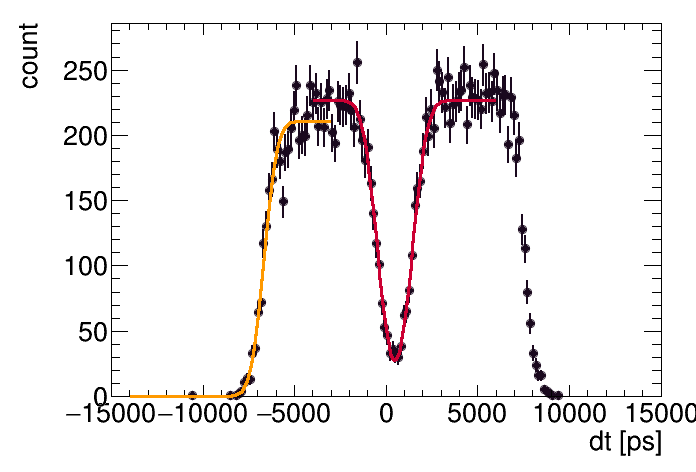

In [43]:
# Now let's focus on one channel

ch1,ch2=coinc_pairs[ibar]
ch1,ch2=34, 289
cut_ch = f"(channelID1=={ch2} && channelID2=={ch1})"

# Note: The title syntax is "<Title>;<Label x axis>;<Label y axis>"
df_ch = df_e1.Filter(cut_ch)

c1=ROOT.TCanvas(); c1.Draw()
h1 = df_ch.Histo1D(("dt", ";dt [ps];count", 200, -15e3, 15e3), 'dt')
h1.Draw("E PLC PMC",)
             


c1=ROOT.TCanvas(); c1.Draw()
# fig, ax = aplt.subplots(1, 1)
# Draw histogram
h1 = df_ch.Histo1D(("dt", ";dt [ps];count", 200, -15e3, 15e3), 'dt')
h1.Draw("E PLC PMC",)

# Fit a Gaussian function to the data
f1 = ROOT.TF1('f1', '[0] * TMath::Erf((x - [1])/(1.4142*[2])) + [0]', -14000, -3000)
f1.SetParameters(400, -7000, 700)
ROOT.Math.MinimizerOptions.SetDefaultTolerance(0.1)
h1.Fit(f1, "RS0")
f1.SetLineColor(int(colors[1]))
f1.Draw("SAME")


f2 = ROOT.TF1('f2', '[0] * TMath::Erf((x - [1])/(1.4142*[2])) + [0] * TMath::Erf((-(x- [3]))/(1.4142*[2]))  + [0]*2', -4000, 6000)
f2.SetParameters(300, 100, 1000, 40)

# ROOT.Math.MinimizerOptions.SetDefaultTolerance(0.1)
# ROOT.Math.MinimizerOptions.SetDefaultPrecision(1e-7)
h1.Fit(f2, "RS0")
f2.SetLineColor(int(colors[3]))
f2.Draw("SAME")


# ROOT.gPad.BuildLegend();

In [50]:
exp(-2.35/5)

# (32*1.414)/1e3*29.979/2

0.6250022682827008

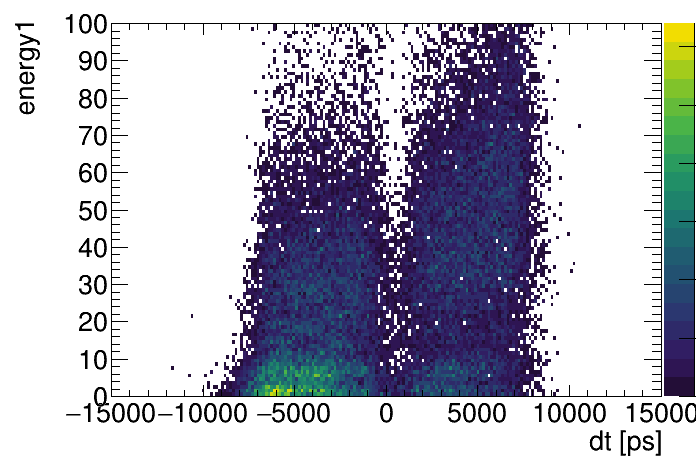

In [9]:
c1=ROOT.TCanvas(); c1.Draw()
# fig, ax = aplt.subplots(1, 1)
# Draw histogram
h1 = df_ch.Histo2D(("dt", ";dt [ps]; energy1", 200, -15e3, 15e3, 100, 0,100), 'dt', 'energy2')
h1.Draw("COLZ",)